# PLOTTING UNIFIED JSON

In [19]:

#import data and packages
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
from functions import *
from gis_functions import *


data=geopandas.read_file('final/complete.geojson')
data_pop=geopandas.read_file('final/gkz_pop+data.gpkg')


In [2]:
#why do i still  get comma values in legend?
data.sum_PE=data.sum_PE.astype('int')


In [3]:
data.mean_year.max()
data.sort_values('mean_year')
data[data.mean_year==0].BL.unique() ##### all 0s come from steiermark
data[data.mean_year>2020].BL.unique() ### all wrongs come from Salzburg
data[data.mean_year<1800].BL.unique() ### karnten and salzburg has 
data[data.mean_year<1800] ### something very wrong with steiermark years


,id,BL,PE_nonitri,before_reg,freq,mean_year,no_nitri,sum_PE,geometry
1693,452,Kärnten,200.000000,4,5,1630,4,240,"POLYGON ((13.61124 47.01909, 13.61113 47.01917..."
2294,113,Salzburg,28.333333,0,5,1621,4,35,"POLYGON ((13.09795 47.63372, 13.09816 47.63444..."
2387,206,Salzburg,6.666667,0,4,1000,3,22,"POLYGON ((12.97875 47.38090, 12.97804 47.38125..."
2433,252,Salzburg,0.000000,0,8,1753,0,119,"POLYGON ((12.41600 47.28889, 12.41603 47.28908..."


<AxesSubplot:>

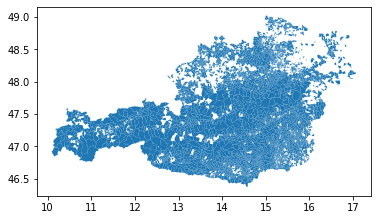

In [2]:
data.plot()

In [3]:
#prepare basemaps
basemap=geopandas.read_file('DATA/shp_new/Oesterreich_BEV_VGD_LAM.shp')
basemap.KG_NR=basemap.KG_NR.astype(int)
basemap.to_crs(epsg=4326,inplace=True)

<AxesSubplot:>

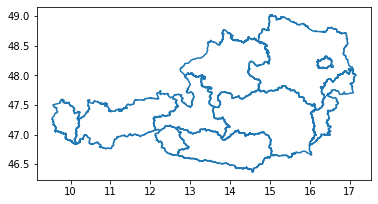

In [4]:
#BLs=basemap.dissolve(by='BL')
#BLs.geometry.boundary.plot()
#BLs.to_file('plotting_data/BL_bounds.gpkg',driver='GPKG')
BLs=geopandas.read_file('plotting_data/BL_bounds.gpkg')

# KG resolution
## todo : move and resize legend, name BL?, scheme?

<AxesSubplot:title={'center':'Number of persons served by small WWTPs by municipality (design size)'}>

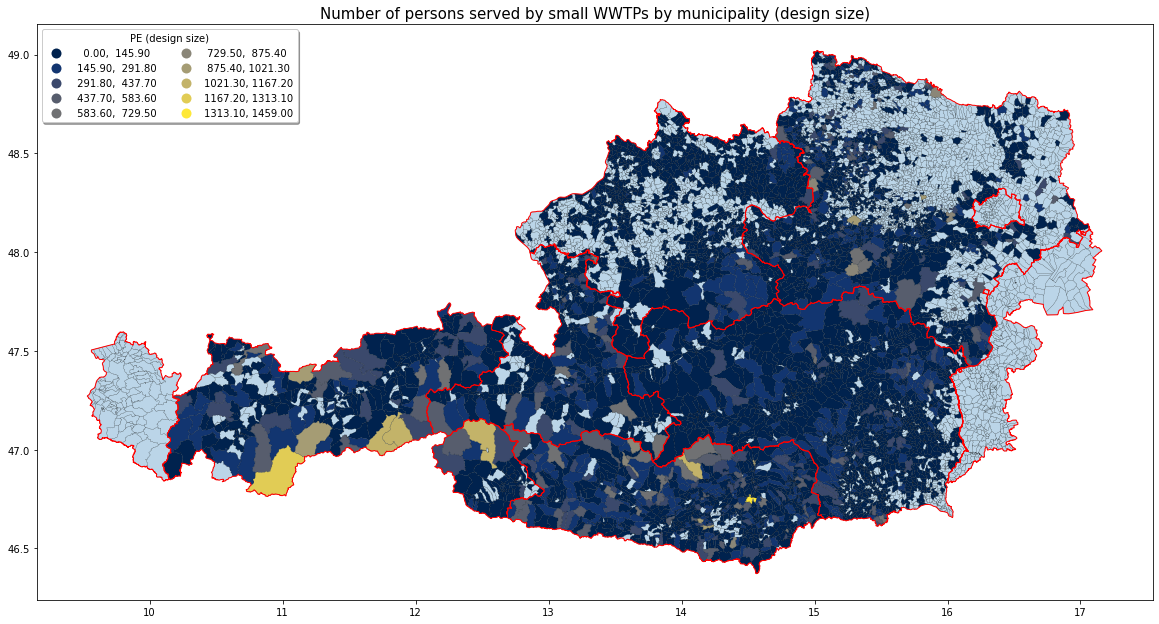

In [16]:
#plot for PE
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(ax=ax, alpha=0.3)
ax.set_title('Number of persons served by small WWTPs by municipality (design size)', fontsize=15)
data.plot(column='sum_PE',cmap='cividis', ax=ax, legend=True, scheme='EqualInterval', k=10,                          # EqualInterval is good
           legend_kwds={'loc': 'upper left','ncol':2, 'shadow': 'True', 'title': 'PE (design size)'})                            # cividis good

#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)

In [14]:
#percentage of non-nitriin total
data.PE_nonitri.sum()/data.sum_PE.sum()*100





19.76124063264971

# NON-NITRIFYING


<AxesSubplot:title={'center':'Percentage of non-nitrfying small WWTPs by municipality'}>

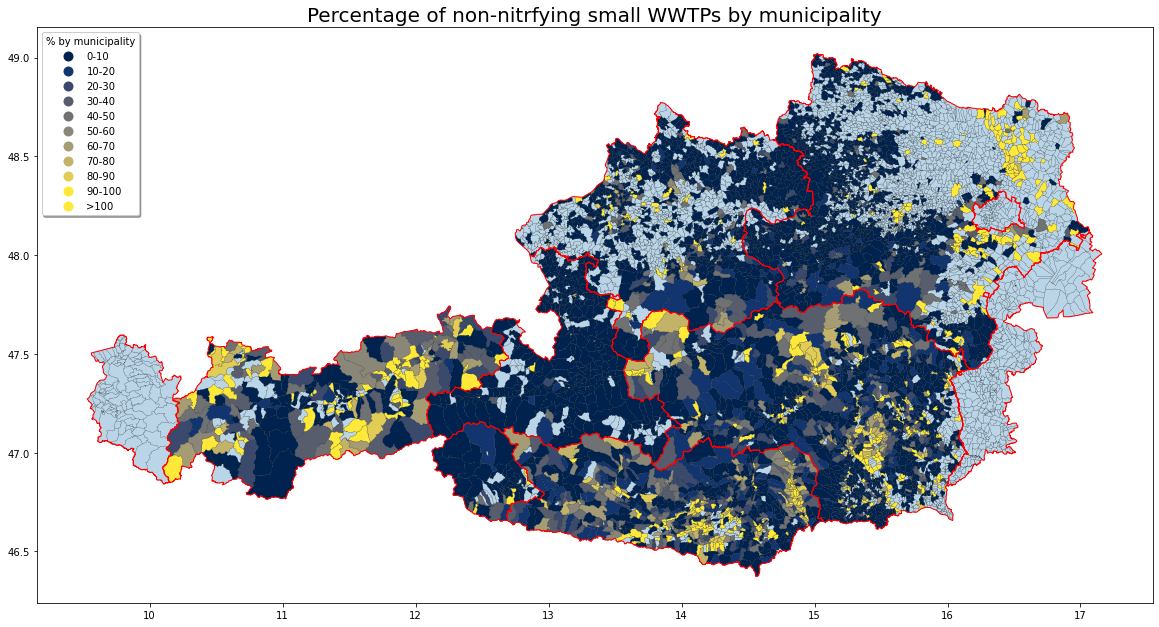

In [18]:
#plot for old infrastructure density. 
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(ax=ax, alpha=0.3)
data.plot(column='%before_reg', ax=ax,legend=True,scheme='user_defined',classification_kwds={'bins':[10,20,30,40,50,60,70,80,90,100,900]},cmap='cividis', k=10, legend_kwds={'loc':'upper left', 'shadow':'True','title':'% by municipality'})
ax.set_title('Percentage of non-nitrIfying small WWTPs by municipality', fontsize=20)

leg_labes=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','>100']
leg=ax.get_legend()
for text, label in zip(leg.get_texts(), leg_labes):
    text.set_text(label)


#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)



# PE on POP

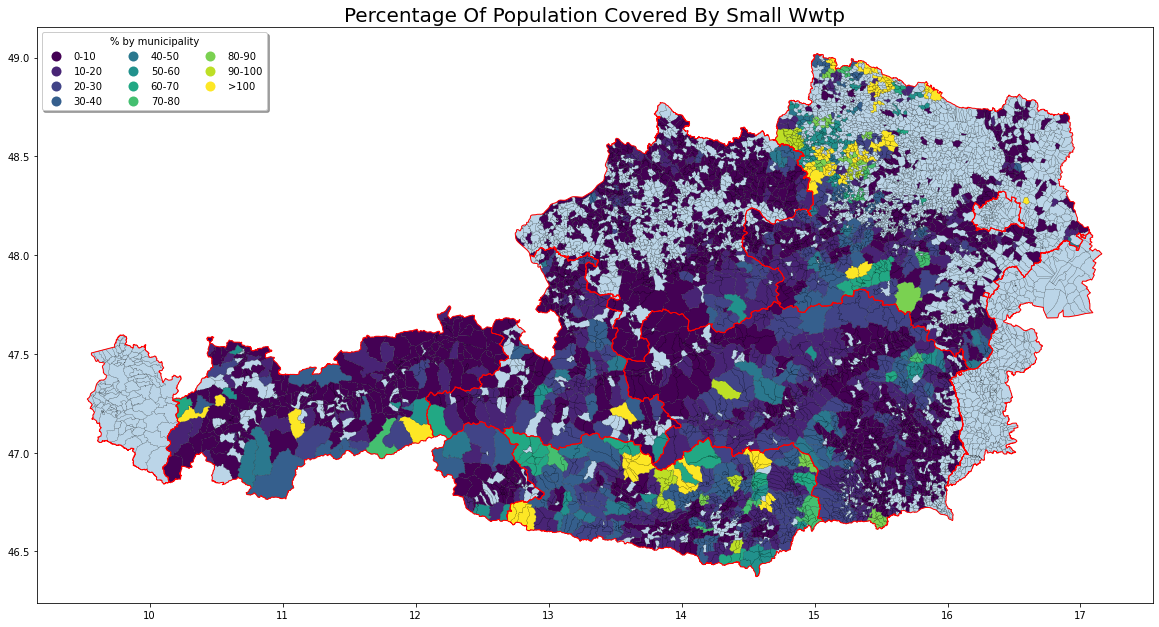

In [21]:
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(ax=ax, alpha=0.3)
data_pop.plot(column='%PEonpop', ax=ax,legend=True,scheme='user_defined',cmap='viridis',classification_kwds={'bins':[10,20,30,40,50,60,70,80,90,100,900]},legend_kwds={'loc':'upper left','ncol':3, 'shadow':'True','title':'% by municipality'})
plt.title('percentage of population covered by small'.title()+' WWTPs', fontsize=20)

#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)


leg_labes=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','>100']
leg=ax.get_legend()
for text, label in zip(leg.get_texts(), leg_labes):
    text.set_text(label)


# NOnitri PE on POP

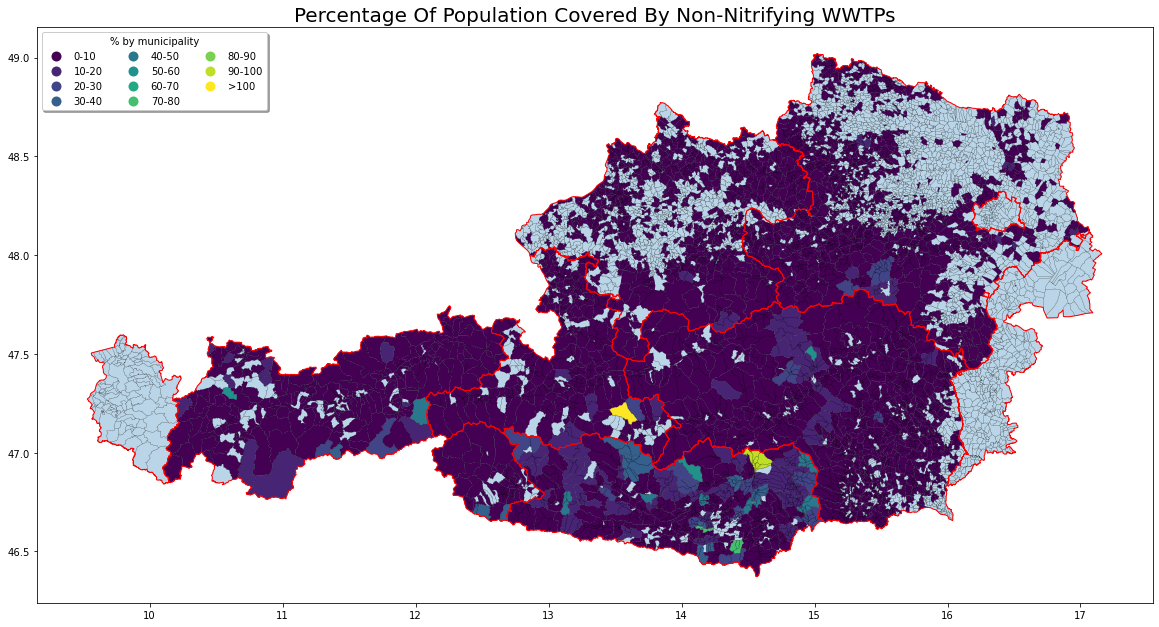

In [22]:
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(ax=ax, alpha=0.3)
data_pop.plot(column='%nonitriPEonpop', ax=ax,legend=True,scheme='user_defined',cmap='viridis',classification_kwds={'bins':[10,20,30,40,50,60,70,80,90,100,900]}, legend_kwds={'ncol':3, 'loc':'upper left', 'shadow':'True','title':'% by municipality'})
ax.set_title('percentage of population covered by non-nitrifying'.title()+' WWTPs', fontsize=20)

#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)

leg_labes=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','>100']
leg=ax.get_legend()
for text, label in zip(leg.get_texts(), leg_labes):
    text.set_text(label)


In [ ]:
#plot for old infrastructure density. how many have been built before 1991?
fig,ax=plt.subplots(1,figsize=(10,15))
basemap.plot(ax=ax, alpha=0.3)
data.plot(column='%before_reg', ax=ax,legend=True,scheme='equal_interval', k=10, legend_kwds={'loc':'lower left', 'shadow':'True','title':'% on total number'})
ax.set_title(' Built before 1991', fontsize=20)
